<a href="https://colab.research.google.com/github/BralexMtz/First-AI-Algorithms/blob/main/ImageClasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

from torchvision import utils
from torchvision import models
from torchvision import datasets
from torchvision import transforms

from PIL import Image
import urllib.request as request
from matplotlib import pyplot as plt

# Modelo pre-entrenado

---



In [2]:
# inception es un modelo de vision de computadora
# cada numero es el numero de capas
inception = models.inception_v3(pretrained=True)

Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-1a9a5a14.pth


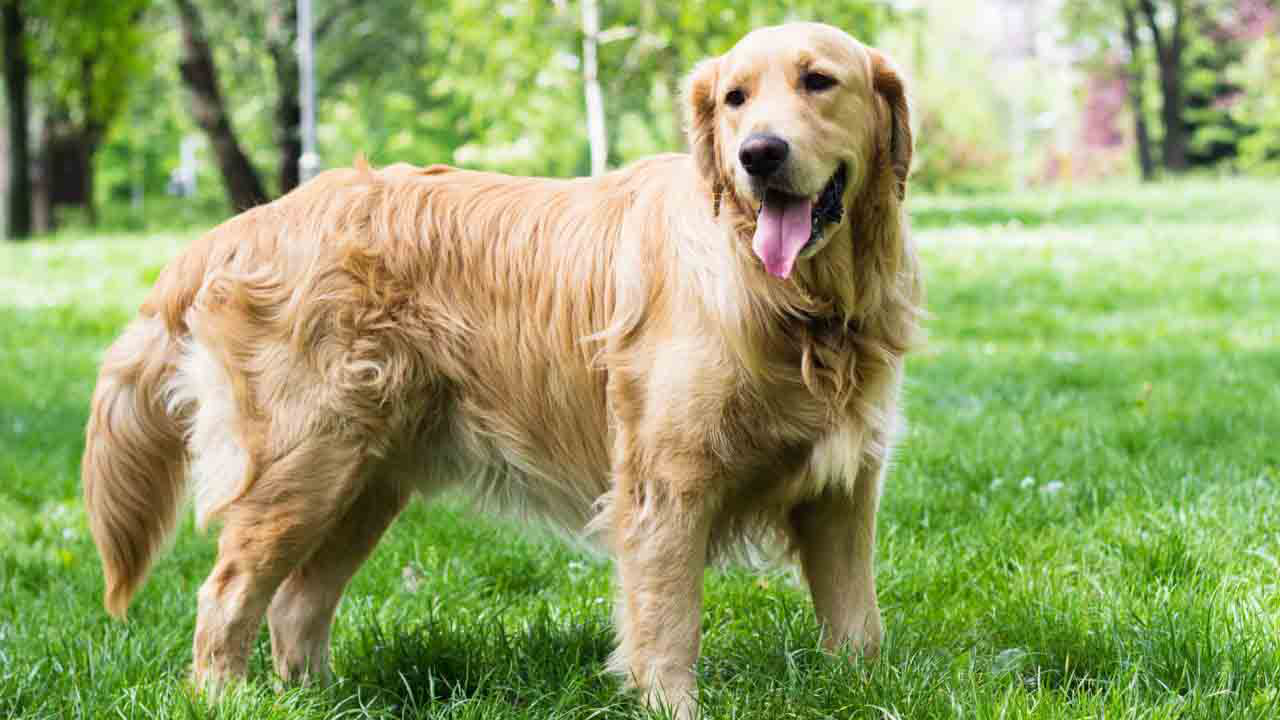

In [3]:
url = 'https://elsumario.com/wp-content/uploads/2018/04/El-Sumario-Beneficios-de-tener-un-Golden-Retriever-como-mascota.jpg'
image = request.urlretrieve(url, 'test.jpg')
#guardamos la imagen para manejarla
img = Image.open(image[0])
img

In [4]:
# preprocesamiento de la imagen para prepararla
preprocess = transforms.Compose([
    # se  cambia el tamaño                           
    transforms.Resize(128),
    # se centra
    transforms.CenterCrop(128),
    # sólo numeros
    transforms.ToTensor(),
    transforms.Normalize(
        # son numeros proporcionados por el modelo
        # para normalizar la imagen
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


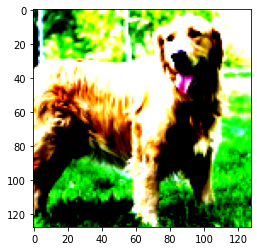

In [5]:
img_t = preprocess(img) #aplicamos el preprocesamiento a la imagen
batch = torch.unsqueeze(img_t, 0) # aumentamos una dimension extra vacia

plt.imshow(img_t.permute(1, 2, 0)) # hacemos una permutación para poder graficarlo con dimensiones correctas

In [6]:
inception.eval()

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [7]:
out = inception(batch) 
# representación despues de pasar por la red neuronal.
# se generá un tensor con las probabilidades para cada etiqueta con la que se preentrenó al modelo
out

tensor([[ 4.4730e-01,  1.1915e+00, -5.5208e+00, -3.7881e+00, -9.4636e+00,
         -4.8609e+00,  7.4734e-01, -5.3260e+00,  1.3261e+00, -8.9340e+00,
         -5.6898e+00, -6.5825e+00, -2.8939e+00, -2.9408e+00, -6.5877e+00,
         -1.1002e+00, -2.0558e+00, -5.4337e+00,  1.7297e+00, -1.7140e+00,
          1.6225e+00, -3.3059e+00, -3.3238e+00, -1.9664e+00, -6.8860e+00,
          3.0683e+00, -5.5537e+00, -2.9385e+00, -2.8287e+00, -5.5529e+00,
          2.3464e+00, -1.0094e+00,  9.4342e-01, -3.0094e+00, -1.5271e+00,
         -5.0901e+00, -2.7374e+00,  1.5950e+00, -3.5812e+00,  2.1298e+00,
         -2.0861e+00, -3.8632e-01, -2.7397e-01, -2.5632e+00, -1.8607e+00,
         -2.3849e+00, -2.8209e+00, -4.2398e-01,  2.7854e+00,  2.7537e+00,
         -6.0607e+00,  2.3608e-01, -5.5282e+00, -2.0832e+00, -9.0147e+00,
         -1.8955e+00, -9.2923e+00,  4.2441e+00,  5.1720e+00, -3.1436e-02,
         -5.2982e+00, -4.9706e-01, -7.1183e-01, -4.3217e+00,  1.7883e+00,
         -5.0890e+00, -1.1665e+00,  1.

In [8]:
# trae las etiquetas de inception y se guardan en labels.
request.urlretrieve('https://gist.githubusercontent.com/ykro/acb00a36f737c12013f6e0f8a0d2cb61/raw/a2bb113b83e274048992f6550050a437fa4db76d/imagenet_classes.txt', 'labels.txt')
with open('labels.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [9]:
out

tensor([[ 4.4730e-01,  1.1915e+00, -5.5208e+00, -3.7881e+00, -9.4636e+00,
         -4.8609e+00,  7.4734e-01, -5.3260e+00,  1.3261e+00, -8.9340e+00,
         -5.6898e+00, -6.5825e+00, -2.8939e+00, -2.9408e+00, -6.5877e+00,
         -1.1002e+00, -2.0558e+00, -5.4337e+00,  1.7297e+00, -1.7140e+00,
          1.6225e+00, -3.3059e+00, -3.3238e+00, -1.9664e+00, -6.8860e+00,
          3.0683e+00, -5.5537e+00, -2.9385e+00, -2.8287e+00, -5.5529e+00,
          2.3464e+00, -1.0094e+00,  9.4342e-01, -3.0094e+00, -1.5271e+00,
         -5.0901e+00, -2.7374e+00,  1.5950e+00, -3.5812e+00,  2.1298e+00,
         -2.0861e+00, -3.8632e-01, -2.7397e-01, -2.5632e+00, -1.8607e+00,
         -2.3849e+00, -2.8209e+00, -4.2398e-01,  2.7854e+00,  2.7537e+00,
         -6.0607e+00,  2.3608e-01, -5.5282e+00, -2.0832e+00, -9.0147e+00,
         -1.8955e+00, -9.2923e+00,  4.2441e+00,  5.1720e+00, -3.1436e-02,
         -5.2982e+00, -4.9706e-01, -7.1183e-01, -4.3217e+00,  1.7883e+00,
         -5.0890e+00, -1.1665e+00,  1.

In [10]:
# escogemos el valor maximo obtenido en todo el arreglo regresado por el modelo
# y tomamos el indice de dicho valor.
_, index = torch.max(out, 1)

In [11]:
# despues escogemos la etiqueta que corresponde a partir de la probabilidad 
# Se normalizan las probabilidades entre cero y uno para el tensor y al multiplicar por 100
# obtenemos el valor en porcentaje
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
# Aqui simplemente mostramos la etiqueta y el porcentaje normalizado para el indice obtenido previamente
labels[index[0]], percentage[index[0]].item()

('golden retriever', 91.47415161132812)

In [12]:
# tambien podemos obtener los más cercanos en la clasificación.
_, indices = torch.sort(out, descending=True)

top_five = indices[0][:5]
for i in top_five:
  print(labels[i], percentage[i].item())

golden retriever 91.47415161132812
Irish terrier 8.129050254821777
soft-coated wheaten terrier 0.267250657081604
briard 0.061012279242277145
Irish setter, red setter 0.04970595985651016


# Trabajando con un dataset

---



In [13]:
data_path = 'data/'
# para entrenar
dataset = datasets.CIFAR10(data_path, train=True, download=True)
# para validar el entrenamiento
validation_set = datasets.CIFAR10(data_path, train=False, download=True)

Extracting data/cifar-10-python.tar.gz to data/
Files already downloaded and verified


In [14]:
# definir las clases del dataset
classes = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']

In [15]:
# el tamaño de imagenes del dataset
len(dataset)

50000

In [16]:
# podemos obtener una imagen
img, label = dataset[50]
img, label, classes[label]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7FEC2B9F9450>, 9, 'truck')

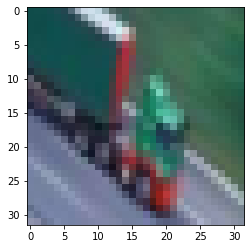

In [17]:
plt.imshow(img)

In [18]:
# lo transformamos a un tensor
tensor_transform = transforms.ToTensor()

img_tensor = tensor_transform(img)
# mostramos la imagen en representacion de tensor
img, img_tensor, img_tensor.shape

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7FEC2B9F9450>,
 tensor([[[0.0627, 0.0667, 0.0667,  ..., 0.2431, 0.2157, 0.2000],
          [0.0627, 0.0627, 0.0588,  ..., 0.2431, 0.2275, 0.2039],
          [0.0627, 0.0588, 0.0588,  ..., 0.2235, 0.2314, 0.2196],
          ...,
          [0.3765, 0.4471, 0.4667,  ..., 0.5020, 0.4706, 0.4588],
          [0.4627, 0.3922, 0.4471,  ..., 0.5451, 0.5137, 0.4745],
          [0.5647, 0.5333, 0.4118,  ..., 0.5686, 0.5373, 0.5137]],
 
         [[0.2980, 0.3020, 0.3020,  ..., 0.4157, 0.3882, 0.3686],
          [0.2980, 0.2980, 0.2941,  ..., 0.4275, 0.4118, 0.3922],
          [0.2980, 0.2941, 0.2941,  ..., 0.4314, 0.4353, 0.4275],
          ...,
          [0.4314, 0.4980, 0.5176,  ..., 0.5294, 0.5098, 0.5137],
          [0.5176, 0.4431, 0.4941,  ..., 0.5725, 0.5490, 0.5255],
          [0.5804, 0.5490, 0.4471,  ..., 0.5922, 0.5647, 0.5529]],
 
         [[0.2902, 0.2941, 0.2941,  ..., 0.3412, 0.3137, 0.2941],
          [0.2902, 0.2902, 0.2902,  ..., 0

In [19]:
# ahora importamos como forma de tensor, 
# ya es en forma de tensor
dataset = datasets.CIFAR10(data_path, train=True, download=True, transform=transforms.ToTensor())

Files already downloaded and verified


In [20]:
img, label = dataset[50]
# ahora el resultado es un tensor 
img

tensor([[[0.0627, 0.0667, 0.0667,  ..., 0.2431, 0.2157, 0.2000],
         [0.0627, 0.0627, 0.0588,  ..., 0.2431, 0.2275, 0.2039],
         [0.0627, 0.0588, 0.0588,  ..., 0.2235, 0.2314, 0.2196],
         ...,
         [0.3765, 0.4471, 0.4667,  ..., 0.5020, 0.4706, 0.4588],
         [0.4627, 0.3922, 0.4471,  ..., 0.5451, 0.5137, 0.4745],
         [0.5647, 0.5333, 0.4118,  ..., 0.5686, 0.5373, 0.5137]],

        [[0.2980, 0.3020, 0.3020,  ..., 0.4157, 0.3882, 0.3686],
         [0.2980, 0.2980, 0.2941,  ..., 0.4275, 0.4118, 0.3922],
         [0.2980, 0.2941, 0.2941,  ..., 0.4314, 0.4353, 0.4275],
         ...,
         [0.4314, 0.4980, 0.5176,  ..., 0.5294, 0.5098, 0.5137],
         [0.5176, 0.4431, 0.4941,  ..., 0.5725, 0.5490, 0.5255],
         [0.5804, 0.5490, 0.4471,  ..., 0.5922, 0.5647, 0.5529]],

        [[0.2902, 0.2941, 0.2941,  ..., 0.3412, 0.3137, 0.2941],
         [0.2902, 0.2902, 0.2902,  ..., 0.3294, 0.3137, 0.2941],
         [0.2902, 0.2863, 0.2863,  ..., 0.3098, 0.3137, 0.

In [21]:
# valores entre 0 y 1
img.min(), img.max()

(tensor(0.0314), tensor(0.9529))

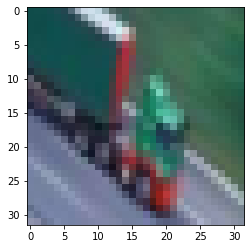

In [22]:
# para mostrar, debemos hacer una permutacion
plt.imshow(img.permute(1, 2, 0))

In [23]:
# convertir todas las imagenes en este stack para poderlo trabajar
imgs = torch.stack([img_tensor for img_tensor, _ in dataset], dim=3)

In [24]:
# muestra las dimensiones, 
imgs.shape

torch.Size([3, 32, 32, 50000])

In [25]:
# calculando la media
imgs.view(3, -1).mean(dim=1)

tensor([0.4914, 0.4822, 0.4465])

In [26]:
# calculando la desviación estandar
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [27]:
# transformacion para convertir el dataset
transform = transforms.Compose(
              [transforms.ToTensor(),
               transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))
              ])


In [28]:
# ahora obtenemos el dataset pero con la transformacion
dataset = datasets.CIFAR10(data_path, train=True, download=True, transform=transform)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'frog'

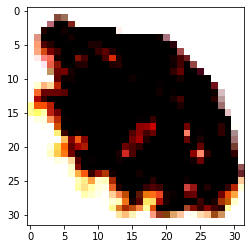

In [29]:
img_transformed,label = dataset[125]
# probamos con otra imagen

# ahora ya tenemos el dataset para poderlo trabajar.
# probamos otra imagen.
plt.imshow(img_transformed.permute(1, 2, 0))
classes[label]